<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistics-and-EDA-in-R/blob/main/Simulate_Replicas_Probabilities_in_Poisson%2C_Exponential_distributions_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
# Install
install.packages("openintro")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘airports’, ‘cherryblossom’, ‘usdata’




In [ ]:
# Load
library(devtools)
library(dplyr)
library(ggplot2)
library(openintro)
library(broom)

Loading required package: usethis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: airports

Loading required package: cherryblossom

Loading required package: usdata



In [ ]:
# Set random seed to 334
set.seed(334)


# Building simulated replicas

## Rolling dice

In [ ]:
die = seq(1,6,1)

# Sample 10000 mean replicas
mean_replicas = replicate(10000, sample(die, 5, replace=TRUE) %>% mean())

## Plot sample distribution of 10000 mean replicas (Central Limit Theorem)

This plot shows the central limit theorem.

The sample distribution of a statistic becomes normally distributed as the number of trials increases.

CLT applies to all summary statistics and no matter the original distribution being sampled from.

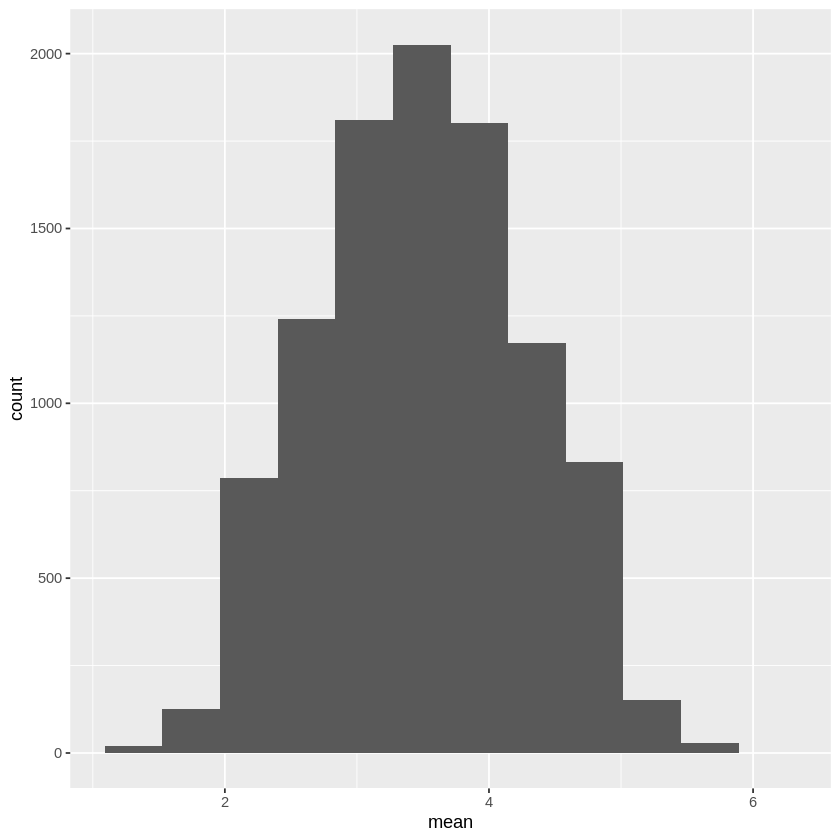

In [ ]:
# Create a histogram of sample distributions
ggplot(data.frame(mean = mean_replicas), aes(mean)) + geom_histogram(bins=12)

# Poisson Distribution

This distribution produces when events happen at a certain rate but completely at random.

e.g.1. Number of people arriving at a bank per hour or number of earthqueakes in a certain place.

e.g.2. Number of products sold each week.

## Supermarket case

Lambda in poisson distribution is the **average number of events per time interval**

for example average number of people arriving at a supermarket: 4 every 10 minutes.

The probability distribution is Poisson and looks like this:

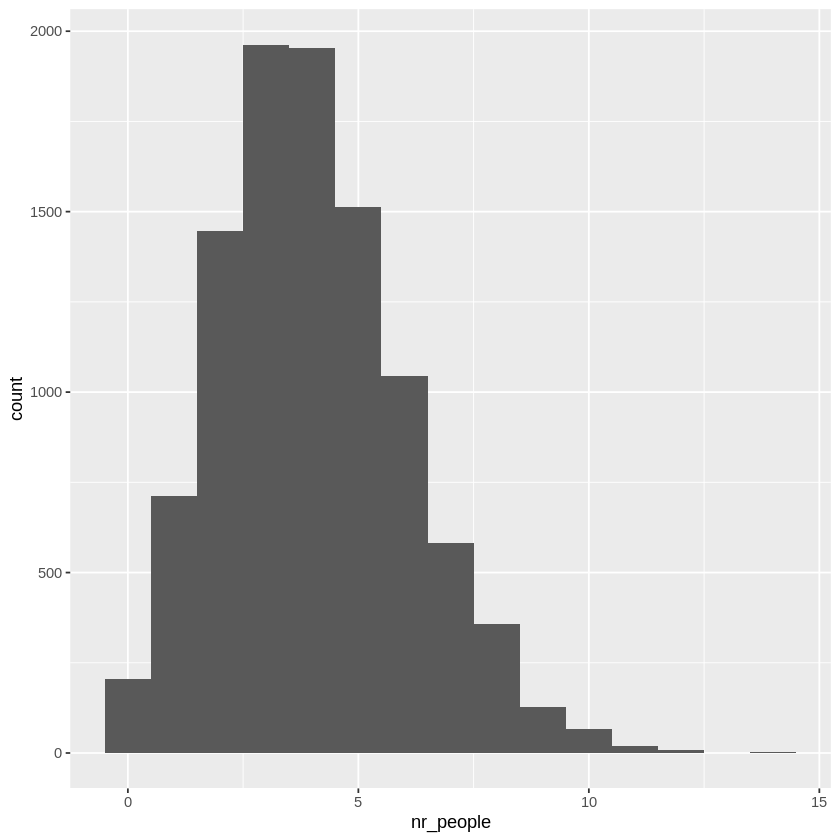

In [ ]:
ggplot(data.frame(nr_people = rpois(10000, lambda =  4)), aes(nr_people)) +
geom_histogram(bins=15)

## Whats the probability of 5 customers coming to the supermarket?

In [ ]:
# Probability of 5 responses. Because is a discrete probability we will use dpois
dpois(5, lambda = 4)

[1] 0.1562935

## What's the probability of having only 2 or fewer customers in a given period?

In [ ]:
# Probability of 2 or fewer responses
ppois(2, lambda = 4)

[1] 0.2381033

## What's the probability of having more than or equal than 10 customers?

In [ ]:
ppois(10, lambda = 4, lower.tail=F)

[1] 0.002839766

0.2% This is rare case.

## how many customers are going to enter 90% of times

In [ ]:
# 90% of times would be less or equal than:
qpois(.90,lambda=4)

[1] 7

# Exponential Distribution

Also uses lambda and continuous as poisson distribution.

For poisson events. **The probability of time between poisson events are exponentially distributed.**

e.g. probability of > 5 minutes between customers arrivals.

## Supermarket (Time between customers arrivals)

We know the average number of people arriving at a supermarket is 4 every 10 minutes. This is **lambda (Poisson)**

now, in terms of **rate** is 0.4 every minute (4 customers / 10 min)

In [ ]:
# rate of customer arrival every minute.
rate_min = 4/10
rate_min


[1] 0.4

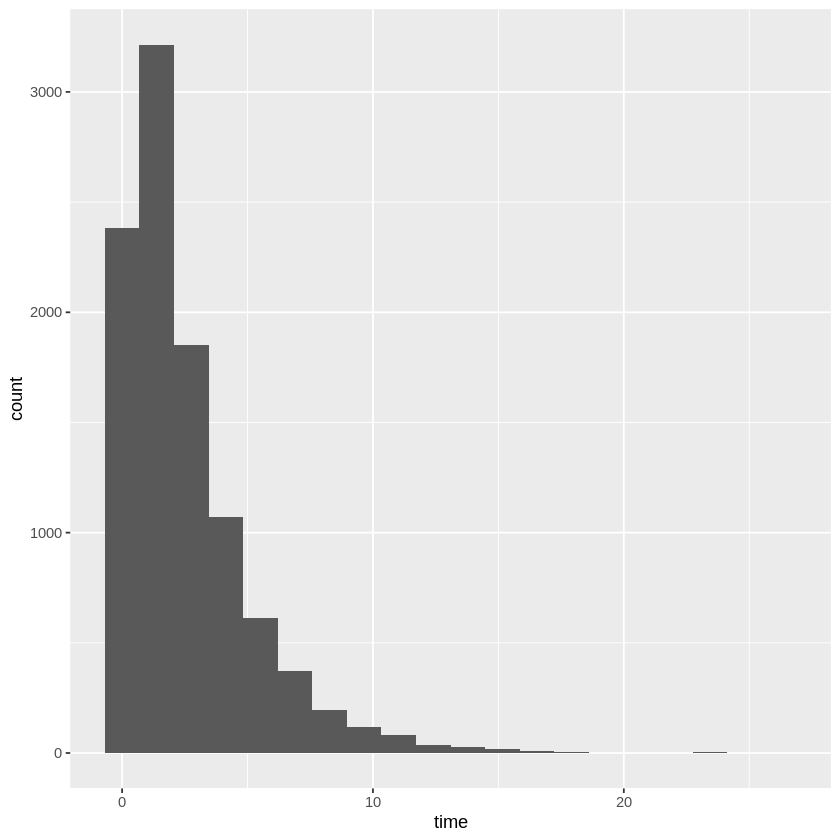

In [ ]:
ggplot(data.frame(time = rexp(10000, rate_min)), aes(time)) +
  geom_histogram(bins=20)

## What's the probability of waiting a customer more than 2 minutes?

In [ ]:
# P(wait > 2 minutes)
pexp(2, rate=rate_min, lower.tail=F)

[1] 0.449329

# Student's-t

Student's-t tails are thicker than normal distribution. This means probability of falling further from the mean is greater.

Student's-t has parameter degrees of freedom (DF) which affects the thickness of tails. **Lower DF means thicker tails.**

# Log-normal distribution

Variables whose logarithm is normally distributed.
Many real world problems follows this distribution.